## TOV equations for structure of spherical star

In Misner-Thorne-Wheeler texbook we have the following equations

$$\frac{dp}{dr}  = -\frac{(\rho+p)(m+4\pi r^3 p)}{r(r-2m)}$$
$$\frac{dm}{dr}  = 4\pi r^2 \rho$$
$$\frac{d\phi}{dr}  = \frac{m+4\pi r^3 p}{r(r-2m)}$$

We assume polytropic equation of state

$$p = k \rho_0^\gamma,  [{\rm i.e.} \rho_0 = (p/k)^{1/\gamma}]$$ 
$$\rho = \rho_0 + \frac{p}{\gamma-1}$$

We put $k=1$ and consider only dimensionless problem (cf. Baumgarte-Shapiro texbook for scaling of true quantities such as stellar radius or mass for $k\ne 1$).

We get only inner part of the metric
$$ds^2 = -e^{2\Phi(r)} dt^2+\frac{dr^2}{1-\frac{2m(r)}{r}}+r^2d\Omega^2$$

Note that the code does not solve function $\Phi(r)$ completely, because in the first step we simply assume $\Phi(r=0)=0$ which is not OK, the right boundary condition is $\Phi(\infty)=0$.

**Problem:** Find the coordinate time a null particle (neutrino) needs to get from the center of the star to its surface.


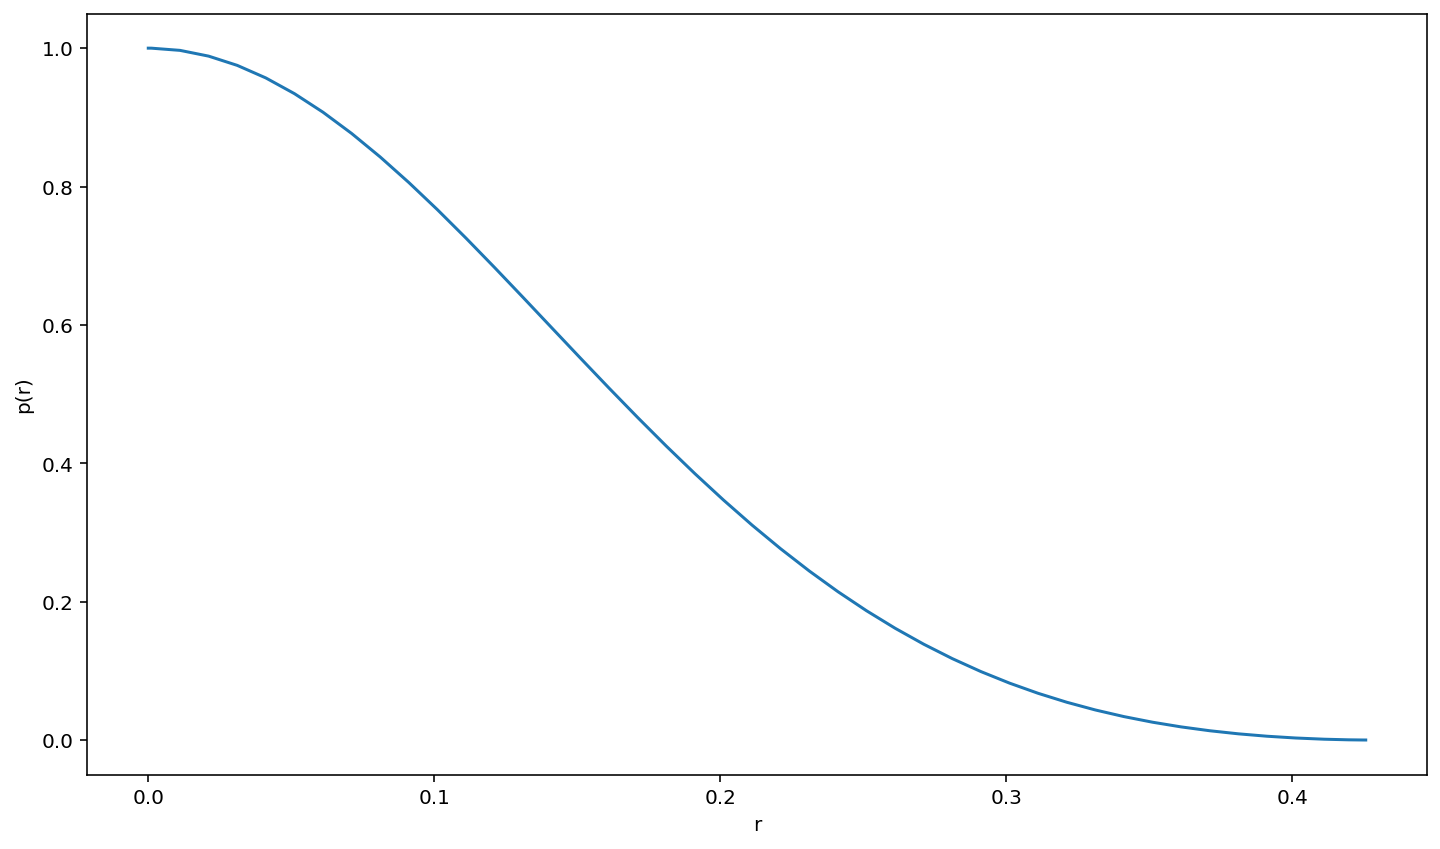

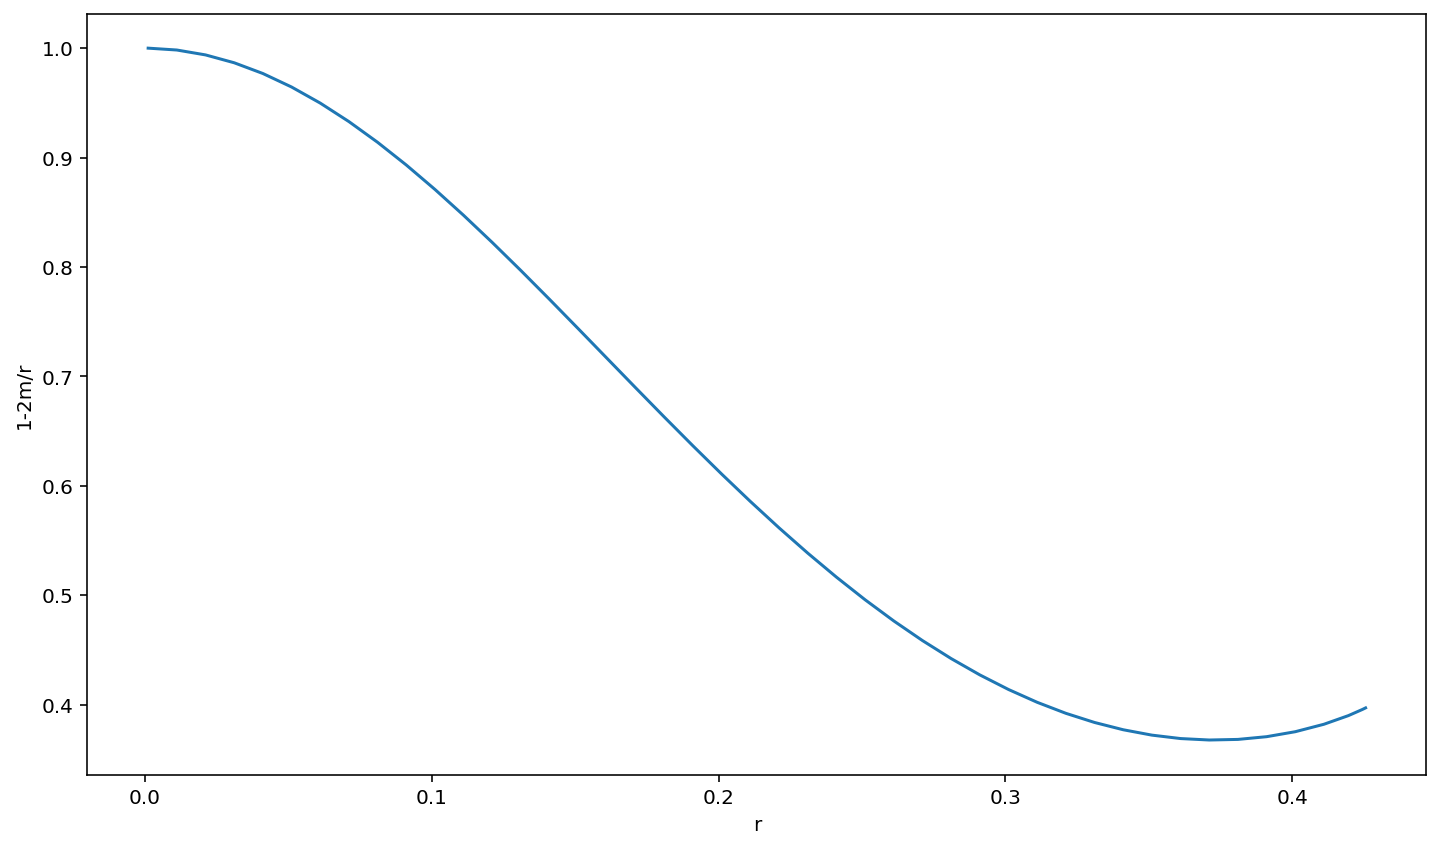

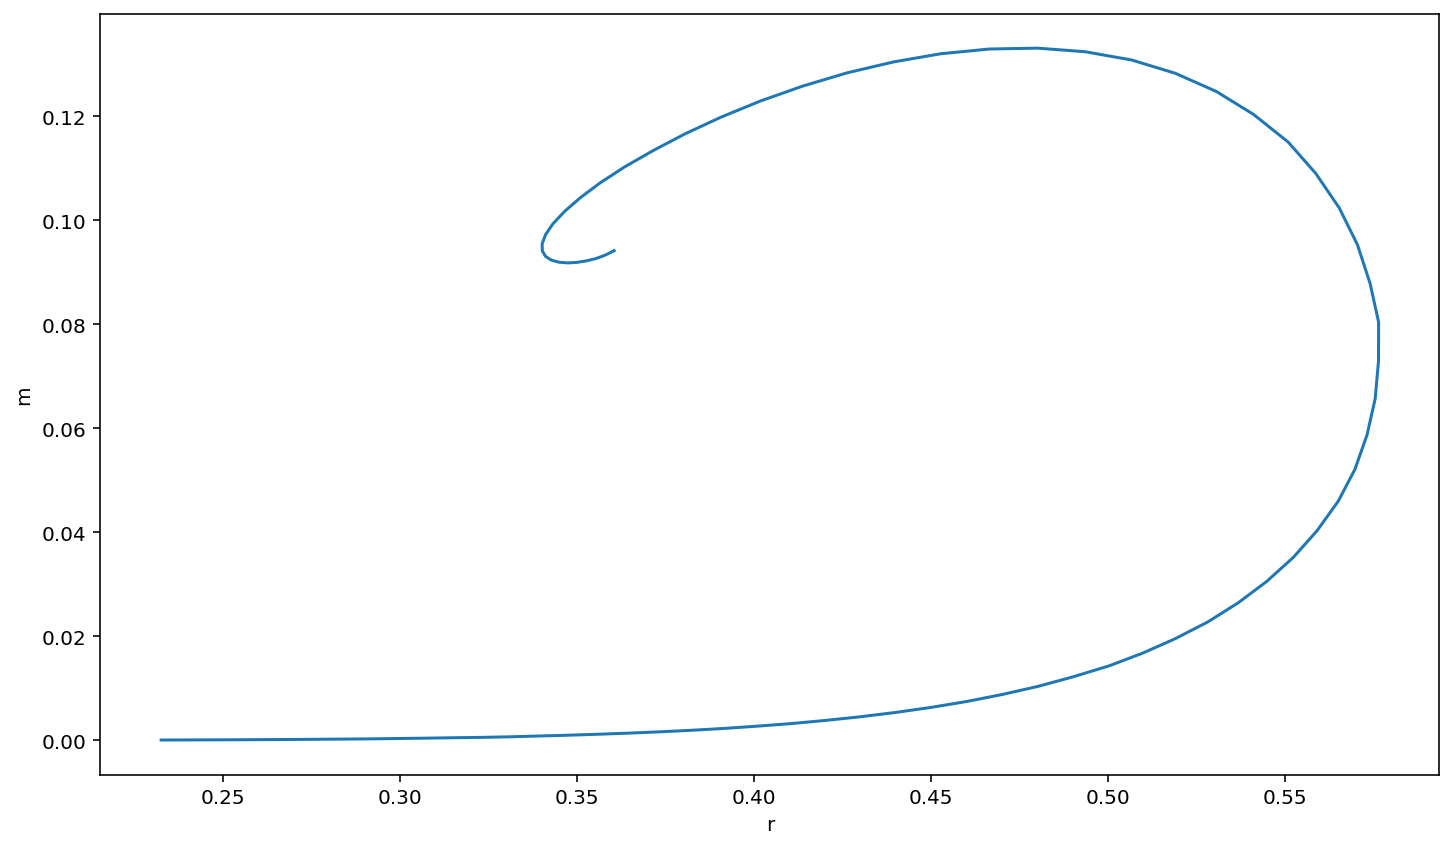

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# EOS polytropic index
gamma = 2.5
Pi    = np.pi

# ODE solver output
dr_Max = 0.01

# central pressure
p0    = 1

# indices of functions p(r), m(r), phi(r)
ip, im, iphi = (0,1,2)

# eqautions
def TOVeq(r, U):
    p, m, phi = U

    rho = 0
    if p>0:
        rho = p**(1/gamma)+p/(gamma-1)

    dphidr = 0
    if r>0:
        dphidr = (m + 4*Pi * r**3 * p)/(r*(r - 2*m))

    dpdr = -(rho + p)*dphidr
    dmdr = 4*Pi * r**2 * rho

    return [dpdr, dmdr, dphidr]


# Terminate integration at the stellar surface
def zero_p(r, U):
    p, m, phi = U
    return p

zero_p.terminal = True

# initital/boundary values
# note that phi(infty)=0 not phi(0), so the result of integration phi(r) has to shifted
U0 = [p0,0,0]   

sol =  solve_ivp(TOVeq, (0,10), U0, events=zero_p, max_step=dr_Max)

plt.plot(sol.t, sol.y[ip])
plt.xlabel("r")
plt.ylabel("p(r)")
plt.show()

plt.plot(sol.t[2::], 1-2*sol.y[im,2::]/sol.t[2::])
plt.xlabel("r")
plt.ylabel("1-2m/r")
plt.show()

#print( sol.t[-1], sol.y[::,-1])

def rMaxM(p0):
    U0 = [p0,0,0]
    sol =  solve_ivp(TOVeq, (0,4), U0, events=zero_p, rtol=1E-6, atol=1E-8)
    return  [ sol.t[-1] , sol.y[im,-1] ]

P_list = np.exp( np.arange(-15,6,0.25) )
mr = np.array([ rMaxM(p) for p in P_list ])
plt.plot(mr[::,0],mr[::,1])
plt.xlabel("r")
plt.ylabel("m")
plt.show()


